# AlzhiemerAI: A CNN-Based Alzheimer's Disease Diagnosis System Using MRI Brain Images

***

This code imports the necessary libraries and modules for building and training a CNN for Alzheimer's classification. Here's a brief explanation of each import statement:

* numpy: a library for performing numerical operations in Python, commonly used for scientific computing.
* matplotlib.pyplot: a module for creating visualizations in Python, particularly plotting graphs and charts.
* seaborn: a library for creating statistical visualizations in Python, built on top of matplotlib.
* glob: a module for finding all the pathnames matching a specified pattern according to the rules used by the Unix shell.
* sklearn.utils.shuffle: a function for randomly shuffling the rows of a numpy array or pandas DataFrame.
* sklearn.model_selection.train_test_split: a function for splitting a dataset into training and testing sets.
* skimage.transform.resize: a function for resizing images to a specified size.
* tensorflow.keras: a high-level API for building and training deep learning models in TensorFlow.
* sklearn.metrics: a module containing functions for evaluating the performance of machine learning models.
* tkinter: a standard Python GUI toolkit for building desktop applications.
* The next step would be to load the data, preprocess it, and build the CNN model.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tkinter import Tk, filedialog

These lines of code use the glob function to retrieve the file paths of the image files in four different directories: Mild_Demented, Moderate_Demented, Non_Demented, and Very_Mild_Demented.

It is assumed that each directory contains JPEG images of the corresponding class, where the images of the Mild_Demented class indicate mild Alzheimer's, Moderate_Demented class indicate moderate Alzheimer's, Non_Demented class indicate the absence of Alzheimer's, and Very_Mild_Demented class indicate very mild Alzheimer's.

The file paths of these images are stored in four separate lists: mild_demented, moderate_demented, non_demented, and very_mild_demented, respectively. These lists will be used later on to load and preprocess the image data.

In [16]:
mild_demented = glob('Mild_Demented\*.jpg')
moderate_demented = glob('Moderate_Demented\*.jpg')
non_demented = glob('Non_Demented\*.jpg')
very_mild_demented = glob('Very_Mild_Demented\*.jpg')

This line of code defines a dictionary named classes that maps integer labels to their corresponding class names. The keys of the dictionary are integers from 0 to 3, and the values are strings that represent the class names.

This dictionary will be used later on to convert the integer class labels of the image data to their corresponding class names for visualization purposes.

In [17]:
classes = {0:'Mild Demented', 1: 'Moderate Demented', 2:' Non Demented', 3:'Very Mild Demented'}

These lines of code load and preprocess the image data by reading in the image files from their corresponding directories and storing them in the images list as Python lists.

For each image file, plt.imread function is used to read the image as a Python list. Then, the list is appended to the images list. The integer class label of each image is also appended to the labels list based on its directory.

For example, all the images in the mild_demented directory are given the label 0 (which corresponds to Mild Demented), and so on for the other directories.

At the end of this loop, images is a list of Python lists, where each Python list represents an image in the dataset, and labels is a list of integer class labels corresponding to each image.

In [18]:
images = []
labels = []

for i in mild_demented:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)
    
for i in moderate_demented:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in non_demented:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)
    
for i in very_mild_demented:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

These lines of code use the sns.countplot function from the Seaborn library to create a bar plot of the number of images in each class.

The y argument of the function is set to a list comprehension that converts the integer class labels in labels to their corresponding class names using the classes dictionary defined earlier.

The resulting bar plot displays the number of images in each class on the y-axis and the class names on the x-axis.

The plt.show() function is then called to display the plot.

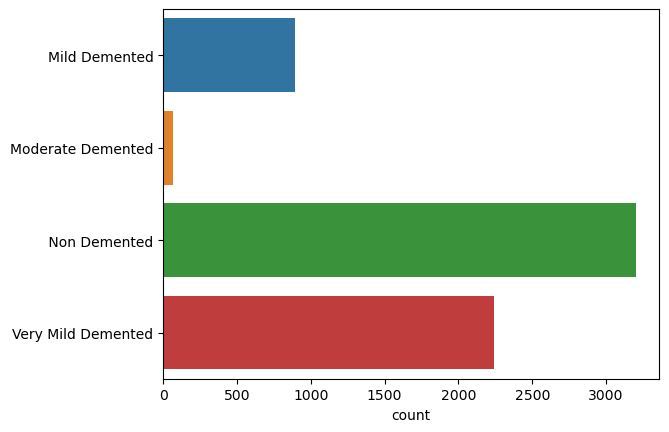

In [19]:
sns.countplot(y = [classes[i] for i in labels])
plt.show()

These lines of code create a 4x4 grid of subplots and display the first 12 images from the dataset with their corresponding class names as titles.

The plt.figure function sets the size of the figure to (10, 8).

The for loop iterates over the first 12 images in the dataset and plots them in the subplots. The plt.subplot function is used to create a grid of 4 rows and 4 columns of subplots, and the i+1 argument is used to select the position of the current subplot in the grid.

For each subplot, the plt.imshow function is used to display the image, and the plt.title function is used to set the title of the subplot to the corresponding class name of the image using the classes dictionary.

The plt.tight_layout function is called at the end to improve the spacing between the subplots.

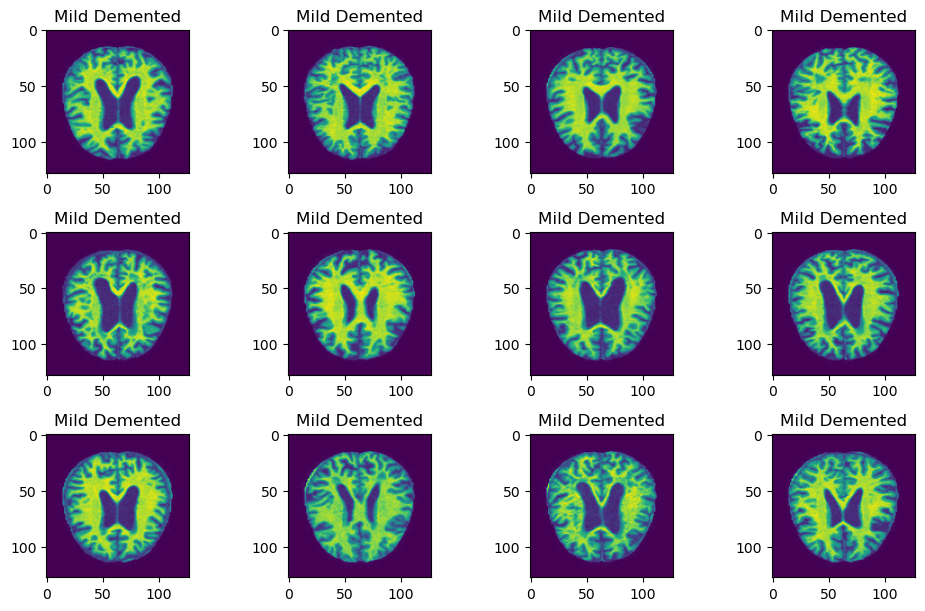

In [21]:
plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

These lines of code resize all the images in the images list to a smaller size of (200, 200) using the resize function from the Scikit-Image library.

The for loop iterates over each image in the images list, and for each image, it resizes it to a smaller size of (200, 200) using the resize function. The resized image is then appended to the X list.

At the end of this loop, X is a list of resized images, where each resized image is represented as a numpy array of shape (200, 200).

In [8]:
X = []

for i in images:
    X.append(resize(i, (200,200)))

These lines of code convert the X list of image arrays and the labels list of integer class labels to numpy arrays.

The np.array function is used to convert the X list to a numpy array, resulting in a new numpy array X of shape (n_samples, 200, 200) where n_samples is the number of images.

Similarly, the np.array function is used to convert the labels list to a numpy array y of shape (n_samples,) where each element represents the integer class label for each corresponding image in X.

In [9]:
X = np.array(X)
y = np.array(labels)

This line of code shuffles the numpy arrays X and y in a random order along the first axis, which corresponds to the samples.

The shuffle function is imported from the sklearn.utils module at the beginning of the script. The function takes two arrays as input and returns shuffled versions of them.

By shuffling X and y together, the correspondence between each image and its label is maintained after shuffling. This is important since the order of the images and their corresponding labels must match for training and evaluation of a machine learning model.

In [10]:
X,y = shuffle(X,y)

The images are plotted after being resized and shuffled to ensure that the resizing and shuffling processes did not produce any errors or mismatches between the images and their corresponding class labels.

Resizing the images is an important preprocessing step for the Convolutional Neural Network (CNN) that will be trained to classify the images. The CNN requires all images to be of the same size, and resizing helps to reduce the computational cost of training by reducing the size of the images.

Shuffling the dataset is important to ensure that the CNN does not learn any order or sequence in the data. If the dataset was not shuffled, the CNN might learn to classify the images based on their position in the dataset, rather than on their visual features. Shuffling the dataset also helps to ensure that the training, validation, and testing sets are representative of the entire dataset, which is important for accurate evaluation of the CNN's performance.

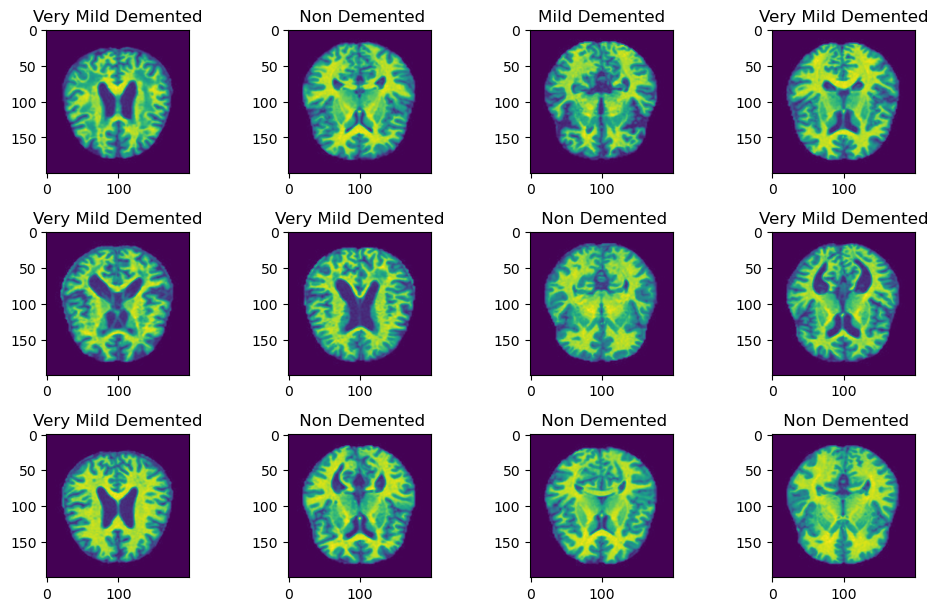

In [13]:
plt.figure(figsize = (10,8))
for i in range(0,12):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i])
    plt.title(classes[y[i]])
plt.tight_layout()

The train_test_split function from the sklearn.model_selection module is used to split the dataset into training and testing sets. This function randomly splits the dataset into training and testing subsets based on the specified test_size parameter, which determines the proportion of the dataset that will be allocated to the testing set.

In this case, the test_size is set to 0.2, which means that 20% of the dataset will be used for testing, while the remaining 80% will be used for training. The train_test_split function returns four arrays: X_train, X_test, y_train, and y_test.

X_train and y_train represent the training set, which will be used to train the CNN. X_train contains the image data, while y_train contains the corresponding class labels.

X_test and y_test represent the testing set, which will be used to evaluate the performance of the trained CNN. X_test contains the image data, while y_test contains the corresponding class labels.

Splitting the dataset into training and testing sets is important to ensure that the performance of the CNN is not biased by overfitting to the training data. By evaluating the performance of the CNN on a separate testing set, we can get a better estimate of its generalization ability to classify new, unseen images.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

This is defining a sequential model for a Convolutional Neural Network (CNN) for Alzheimer's disease classification.

The model architecture consists of two 2D convolution layers, each followed by a max pooling layer. The first convolution layer has 16 filters and a kernel size of (3,3), while the second convolution layer has 32 filters and the same kernel size. Both convolution layers use ReLU activation function and "he_normal" kernel initializer.

After the second max pooling layer, the output is flattened and then fed into a dropout layer with a rate of 0.25. The dropout layer helps to reduce overfitting of the model.

Next, there are three dense layers with ReLU activation functions. The first dense layer has 128 neurons, the second dense layer has 32 neurons, and the final dense layer has 4 neurons (one for each class). The final dense layer uses softmax activation function to output a probability distribution over the classes.

The input shape for the model is (200,200,1), indicating that the model takes grayscale images of size 200x200 as input.

In [17]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu',kernel_initializer="he_normal", input_shape = (200,200,1)),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(32,(3,3),kernel_initializer="he_normal", activation = 'relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    
    layers.Dropout(0.25),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
])

This code compiles the CNN model by configuring the optimizer, loss function, and evaluation metric.

optimizer = 'adam': Adam optimization algorithm is used to optimize the model parameters during training.

loss = 'sparse_categorical_crossentropy': sparse categorical cross-entropy is used as a loss function for the model. This is appropriate since we have a multi-class classification problem with integer labels.

metrics = ['accuracy']: The accuracy metric is used to evaluate the performance of the model during training and testing.

In [18]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

The model.summary() function provides a summary of the CNN model architecture. It displays the layers of the model, the output shapes, and the number of trainable parameters in each layer.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dropout (Dropout)           (None, 73728)             0

The %time command is used to measure the execution time of a single statement in Python. In this case, it is used to measure the training time of the CNN model. The fit function of the model is used to train the model on the training data for a specified number of epochs (15 in this case), while also validating the model on a small fraction (10%) of the training data. The fit function returns a History object which contains information about the training and validation losses and accuracies at each epoch.

Using %time before model.fit allows us to see the total execution time for the training process. This is useful for comparing the performance of different models or configurations.

In [20]:
%time model.fit(X_train,y_train, epochs=15, validation_split=0.1)

Epoch 1/15
144/144 [==============================] - 85s 567ms/step - loss: 1.4003 - accuracy: 0.5267 - val_loss: 0.8621 - val_accuracy: 0.6172
Epoch 2/15
144/144 [==============================] - 87s 605ms/step - loss: 0.6987 - accuracy: 0.7120 - val_loss: 0.5877 - val_accuracy: 0.7812
Epoch 3/15
144/144 [==============================] - 107s 744ms/step - loss: 0.3858 - accuracy: 0.8613 - val_loss: 0.3148 - val_accuracy: 0.8887
Epoch 4/15
144/144 [==============================] - 99s 689ms/step - loss: 0.2334 - accuracy: 0.9193 - val_loss: 0.1929 - val_accuracy: 0.9453
Epoch 5/15
144/144 [==============================] - 94s 653ms/step - loss: 0.1022 - accuracy: 0.9677 - val_loss: 0.2335 - val_accuracy: 0.9062
Epoch 6/15
144/144 [==============================] - 97s 672ms/step - loss: 0.0676 - accuracy: 0.9813 - val_loss: 0.1209 - val_accuracy: 0.9648
Epoch 7/15
144/144 [==============================] - 98s 681ms/step - loss: 0.0440 - accuracy: 0.9885 - val_loss: 0.0824 - val_a

This line of code uses the trained CNN model to make predictions on the test dataset X_test. The predicted values are stored in the variable y_pred.

In [26]:
y_pred = model.predict(X_test)

40/40 [==============================] - 6s 142ms/step


This line of code converts the predicted values stored in y_pred from a one-hot encoded format to a categorical format. It does this by finding the index of the highest value in each row of y_pred and storing it as the predicted category label. The np.argmax() function is used to find the index of the highest value in each row.

In [27]:
y_pred = [np.argmax(i) for i in y_pred]

This line of code computes the accuracy of the predicted labels y_pred compared to the true labels y_test. The accuracy_score function from the scikit-learn library is used for this purpose. It takes in two arguments - the true labels and the predicted labels, and returns the accuracy of the predicted labels.

The accuracy is defined as the proportion of correctly classified instances out of the total number of instances in the dataset. It is a common metric for evaluating the performance of classification models.

In [28]:
accuracy_score(y_test, y_pred)

0.97578125

This code generates a confusion matrix heatmap, which helps to visualize the performance of the classification model.

confusion_matrix(y_test, y_pred) calculates the confusion matrix using the true labels y_test and predicted labels y_pred. The result is then plotted using sns.heatmap() from the Seaborn library. The annot parameter is set to True to display the numerical values in each cell, and fmt is set to 'd' to format the values as integers.

The confusion matrix heatmap provides a visual representation of the number of correct and incorrect predictions made by the model for each class. The diagonal elements represent the number of correctly classified images for each class, while the off-diagonal elements represent the misclassified images. The color intensity of each cell indicates the number of images classified into that cell.

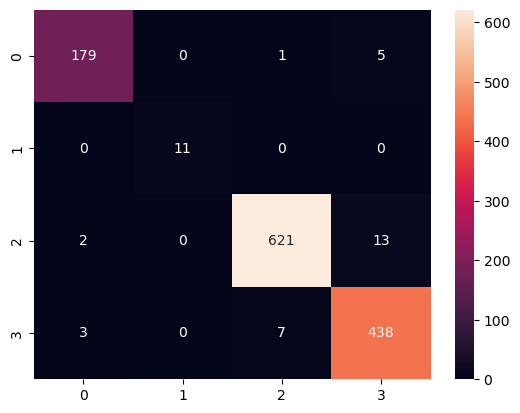

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

The classification_report() function from scikit-learn is used to generate a text report showing the main classification metrics of the model. These metrics include precision, recall, f1-score, and support.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It is a measure of the model's ability to correctly predict positive samples. A high precision score indicates that the model is good at predicting positive samples.

Recall: Recall is the ratio of correctly predicted positive observations to the total actual positive observations. It is a measure of the model's ability to find all positive samples. A high recall score indicates that the model is good at finding positive samples.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, and a high F1-score indicates that the model has good precision and recall.

Support: The support is the number of samples in each class.

The confusion matrix is plotted using the heatmap() function from seaborn library, which shows the actual and predicted classes. The annotations in the heatmap represent the number of samples in each category.

By looking at the classification report and confusion matrix, we can evaluate the performance of our model.

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       185
           1       1.00      1.00      1.00        11
           2       0.99      0.98      0.98       636
           3       0.96      0.98      0.97       448

    accuracy                           0.98      1280
   macro avg       0.98      0.98      0.98      1280
weighted avg       0.98      0.98      0.98      1280



The Make_Prediction() function allows the user to choose an image file from their computer and pass it through the trained model to make a prediction.

First, the function opens a file dialog window for the user to select the image file they want to make a prediction on. The selected file path is then stored in the file_path variable.

Next, the selected image is read using plt.imread() and then resized to 200x200 pixels using the resize() function from scikit-image. The resized image is appended to the images list.

The images list is then converted to a NumPy array, and the model.predict() function is used to make a prediction on the single image. The predicted label is extracted using np.argmax() and mapped to its corresponding class label using the classes dictionary.

Finally, the function displays the original image and the predicted label using plt.imshow() and plt.title().

In [45]:
def Make_Prediction():
    root = Tk()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", ".jpg")])
    root.withdraw()
    
    images = []
    img = plt.imread(file_path)
    img = resize(img, (200,200))
    images.append(img)
        
    images = np.array(images)
    predictions = model.predict(images)
    predictions = [classes[np.argmax(i)] for i in predictions]
    plt.imshow(img)
    plt.title(f"Predicted = {predictions[0]}")

1/1 [==============================] - 0s 72ms/step


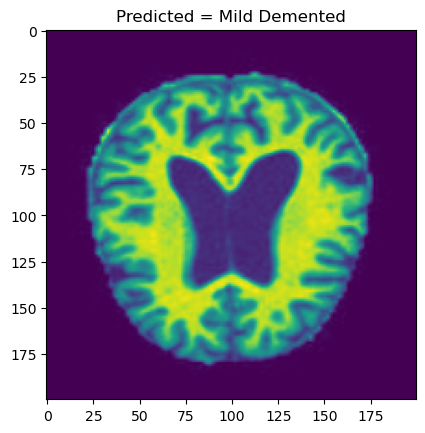

In [46]:
Make_Prediction()

***

<b>Require help with your AI/ML/DL Project? You can connect me:
    
* Mail: vishnu.data.ai@gmail.com
* LinkedIn: https://www.linkedin.com/in/vishnu-viswanath-mm/
* GitHub: https://github.com/vishnuvizs
* Medium: https://medium.com/@vishnu-viswanath-mm </b>

# <center><a style= "color:lightblue;" href = "https://www.linkedin.com/in/vishnu-viswanath-mm/">VISHNU VISWANATH</a></center>